In [1]:
import numpy as np
import pandas as pd
import os

# Specify the directory path where your images are located
image_directory = "Dataset/Focus"

# List all files in the specified directory
for filename in os.listdir(image_directory):
    if os.path.isfile(os.path.join(image_directory, filename)):
        print(os.path.join(image_directory, filename))

In [2]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [3]:
X = []
Y = []

for i in tqdm(glob('Dataset/Focus/focus/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('Dataset/Focus/not focus/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)  

  0%|          | 0/118 [00:00<?, ?it/s]

100%|██████████| 130/130 [00:09<00:00, 14.21it/s]


In [4]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

In [7]:
model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 3)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [9]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='prediction.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=callback)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.5301 - loss: 0.9877
Epoch 1: val_loss improved from inf to 0.69220, saving model to prediction.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 529ms/step - accuracy: 0.5427 - loss: 0.9559 - val_accuracy: 0.6471 - val_loss: 0.6922
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.8069 - loss: 0.4726
Epoch 2: val_loss improved from 0.69220 to 0.69111, saving model to prediction.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step - accuracy: 0.8088 - loss: 0.4717 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.9008 - loss: 0.2600
Epoch 3: val_loss improved from 0.69111 to 0.68964, saving model to prediction.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step - accuracy: 0.8971 - loss: 0.2653 - val_accuracy: 0.5294 - val_loss: 0.6896
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.8809 - loss: 0.2935
Epoch 4: val_loss did not improve from 0.68964
5/5 ━━━━━━━━━━━━━━━━

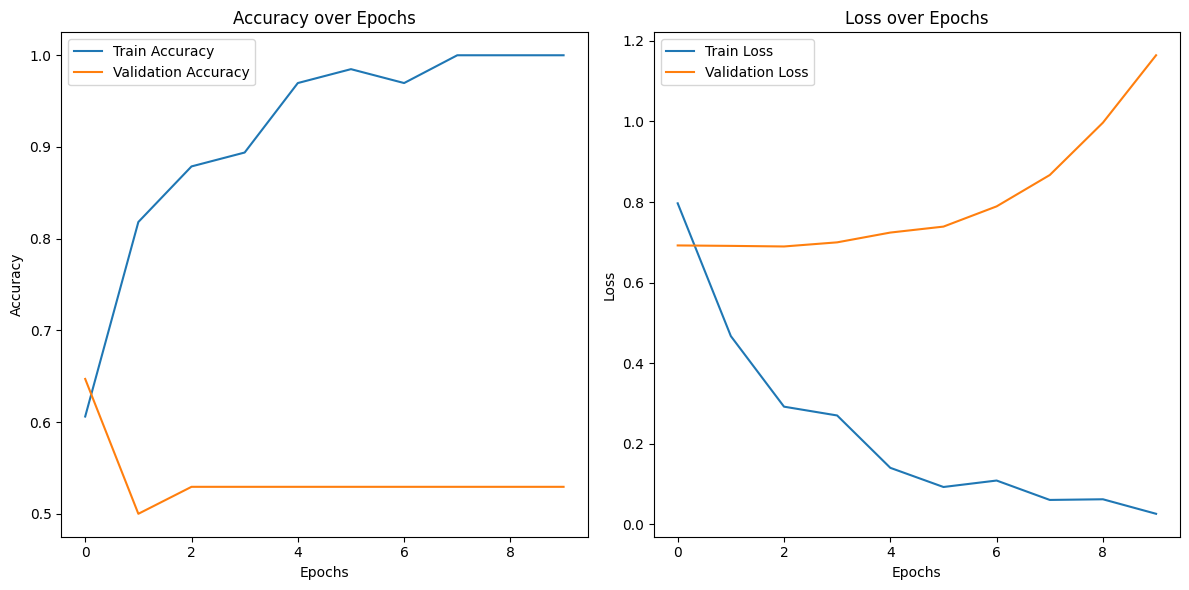

In [10]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


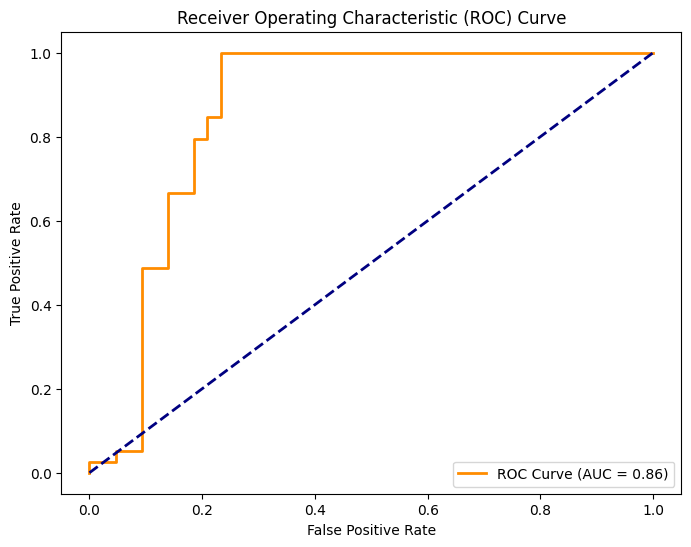

In [15]:
from sklearn.metrics import roc_curve, auc

# Compute probabilities
y_probs = best_model.predict(x_test).ravel()

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


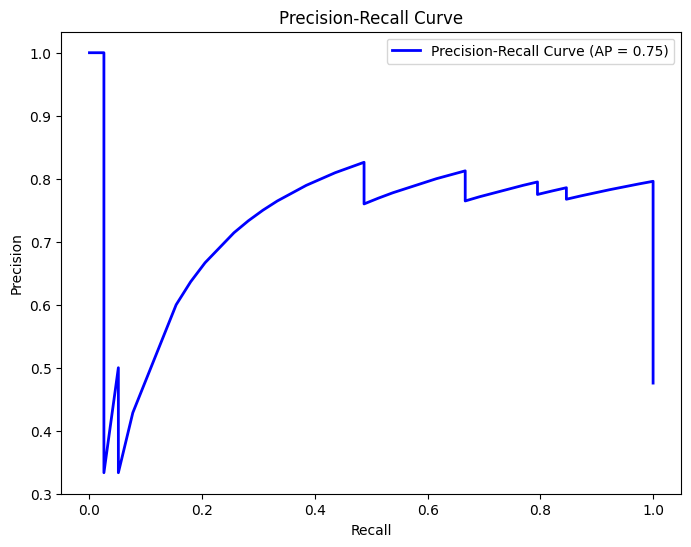

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


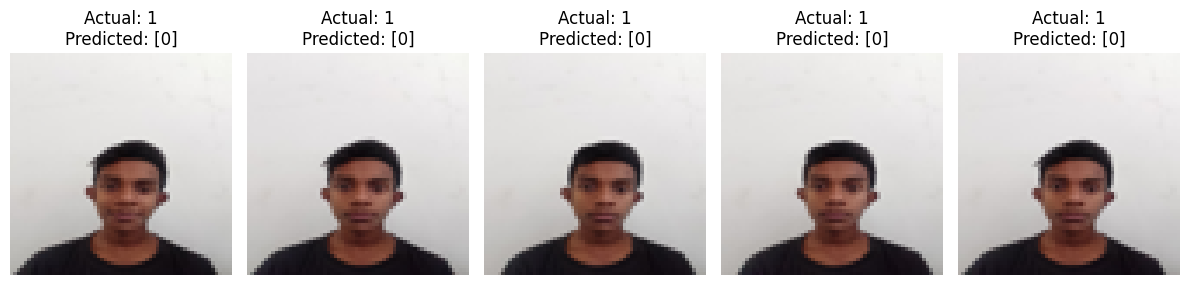

In [21]:
# Sample misclassified Samples
misclassified_indices = np.where(y_test != preds.ravel())[0]

plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:5]):  # Show 5 misclassified examples
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Actual: {y_test[idx]}\nPredicted: {preds[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
from keras.models import save_model
save_model(model, 'detection.h5')

In [12]:
from keras.models import load_model
best_model = load_model('prediction.keras')
best_model.evaluate(x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5395 - loss: 0.6860


[0.6909453868865967, 0.5243902206420898]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


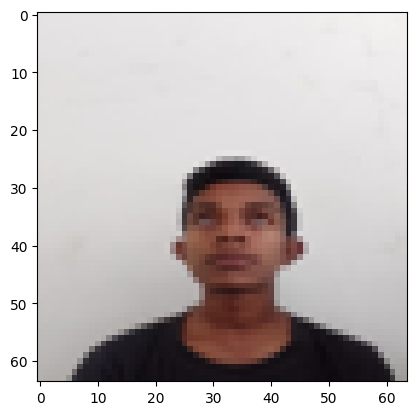

Not Focus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


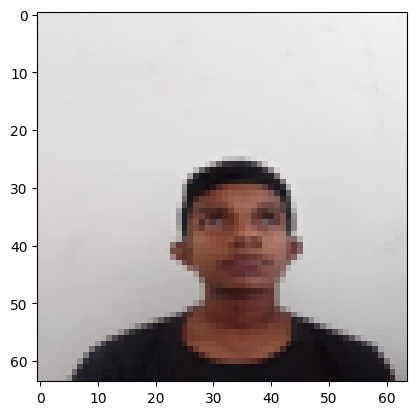

Not Focus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


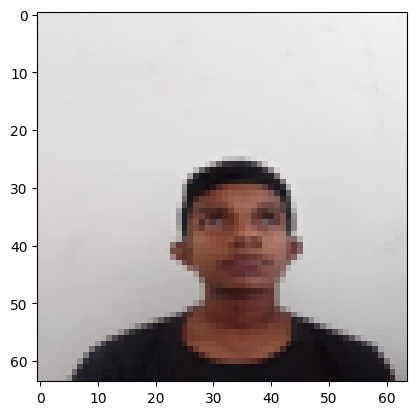

Not Focus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


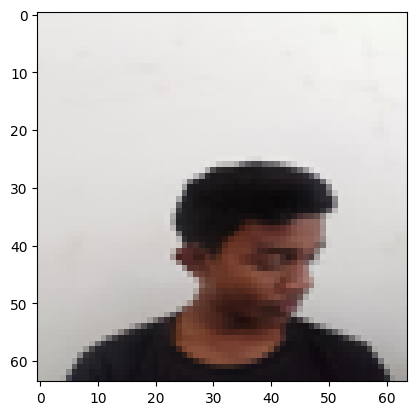

Not Focus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


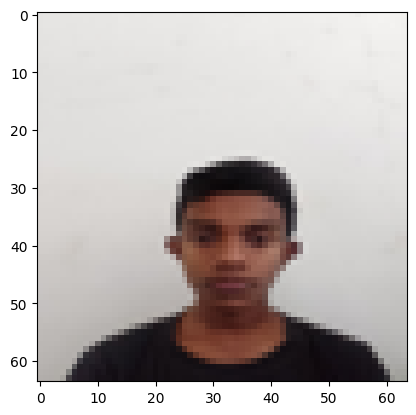

Not Focus


In [13]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Focus')
    else:
        print("Not Focus")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Text(0.5, 25.722222222222214, 'Actual')

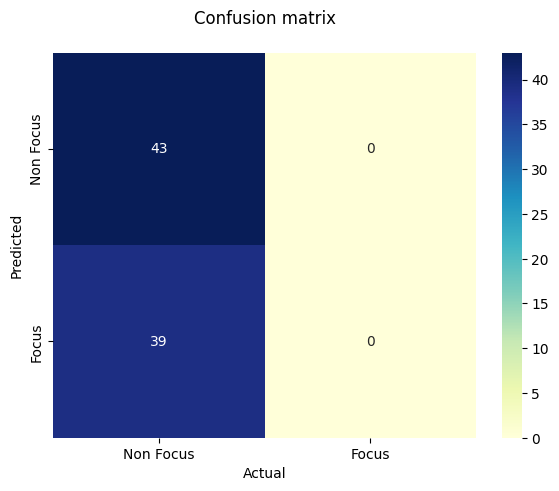

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Non Focus', 'Focus'], columns=['Non Focus', 'Focus'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")